In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dat=np.loadtxt('data/length_with_time_01_DangAnhVu.csv', delimiter=',', skiprows=1)
time_arrive=dat[:,0]
packet_length=dat[:,1]
data_size = time_arrive.shape[0]
print('Data Size:', data_size)

Data Size: 30438


In [4]:
A = time_arrive
L = packet_length # Packet length
C = 100000000 # Link capacity
S = L*8/C
D = np.ndarray(shape=(data_size,), dtype=float, order='F') # Depature time
T = np.ndarray(shape=(data_size,), dtype=float, order='F') # Delay Time
D[0] = A[0] + S[0]
T[0] = S[0] #D[0] - A[0]
curr_D_max = D[0];
for i in range(1, data_size):
    D[i] = max(curr_D_max, A[i]) + S[i]
    T[i] = D[i] - A[i]
    curr_D_max = max(curr_D_max, D[i])
print("Departure time:", D)
print("Delay time:", T)

Departure time: [1.07743220e-02 1.08954420e-02 4.12460280e-02 ... 8.66199715e+01
 8.66207856e+01 8.66209067e+01]
Delay time: [0.00012112 0.00020683 0.00012112 ... 0.00045577 0.00012112 0.00022931]
Last Departure time: 86.62090668900001


In [9]:
last_departure_time = D[-1]
col_count = int(last_departure_time*10+4)
print(col_count)
delay_packet_count = np.ndarray(shape=(col_count,), dtype=int, order='F')
for i in range(0, data_size):
    A_in = int(A[i]*10)
    D_in = int(D[i]*10)
    delay_packet_count[A_in] += 1
    if(D_in > A_in): delay_packet_count[D_in] += 1
print(delay_packet_count)

870
[                 40     140223327666324      94516240503301
                  40                   9                  17
                  19                  28                 106
                  33     140223327666315      94516240505308
                  30                  37                  36
                  32                  19                 189
                  41     140223327666319      94516240505708
                  23                  48                  17
                  27                  31                 241
                  34     140223327666323      94516240505797
                  25                  52                   5
                  17                   4                 289
                  13     140223327666294      94516240505805
                   2                  21                   0
     140223629433193                  15                 360
                   7     140223327666294      94516240505874
                   1

Text(0, 0.5, 'Delay Packet Count')

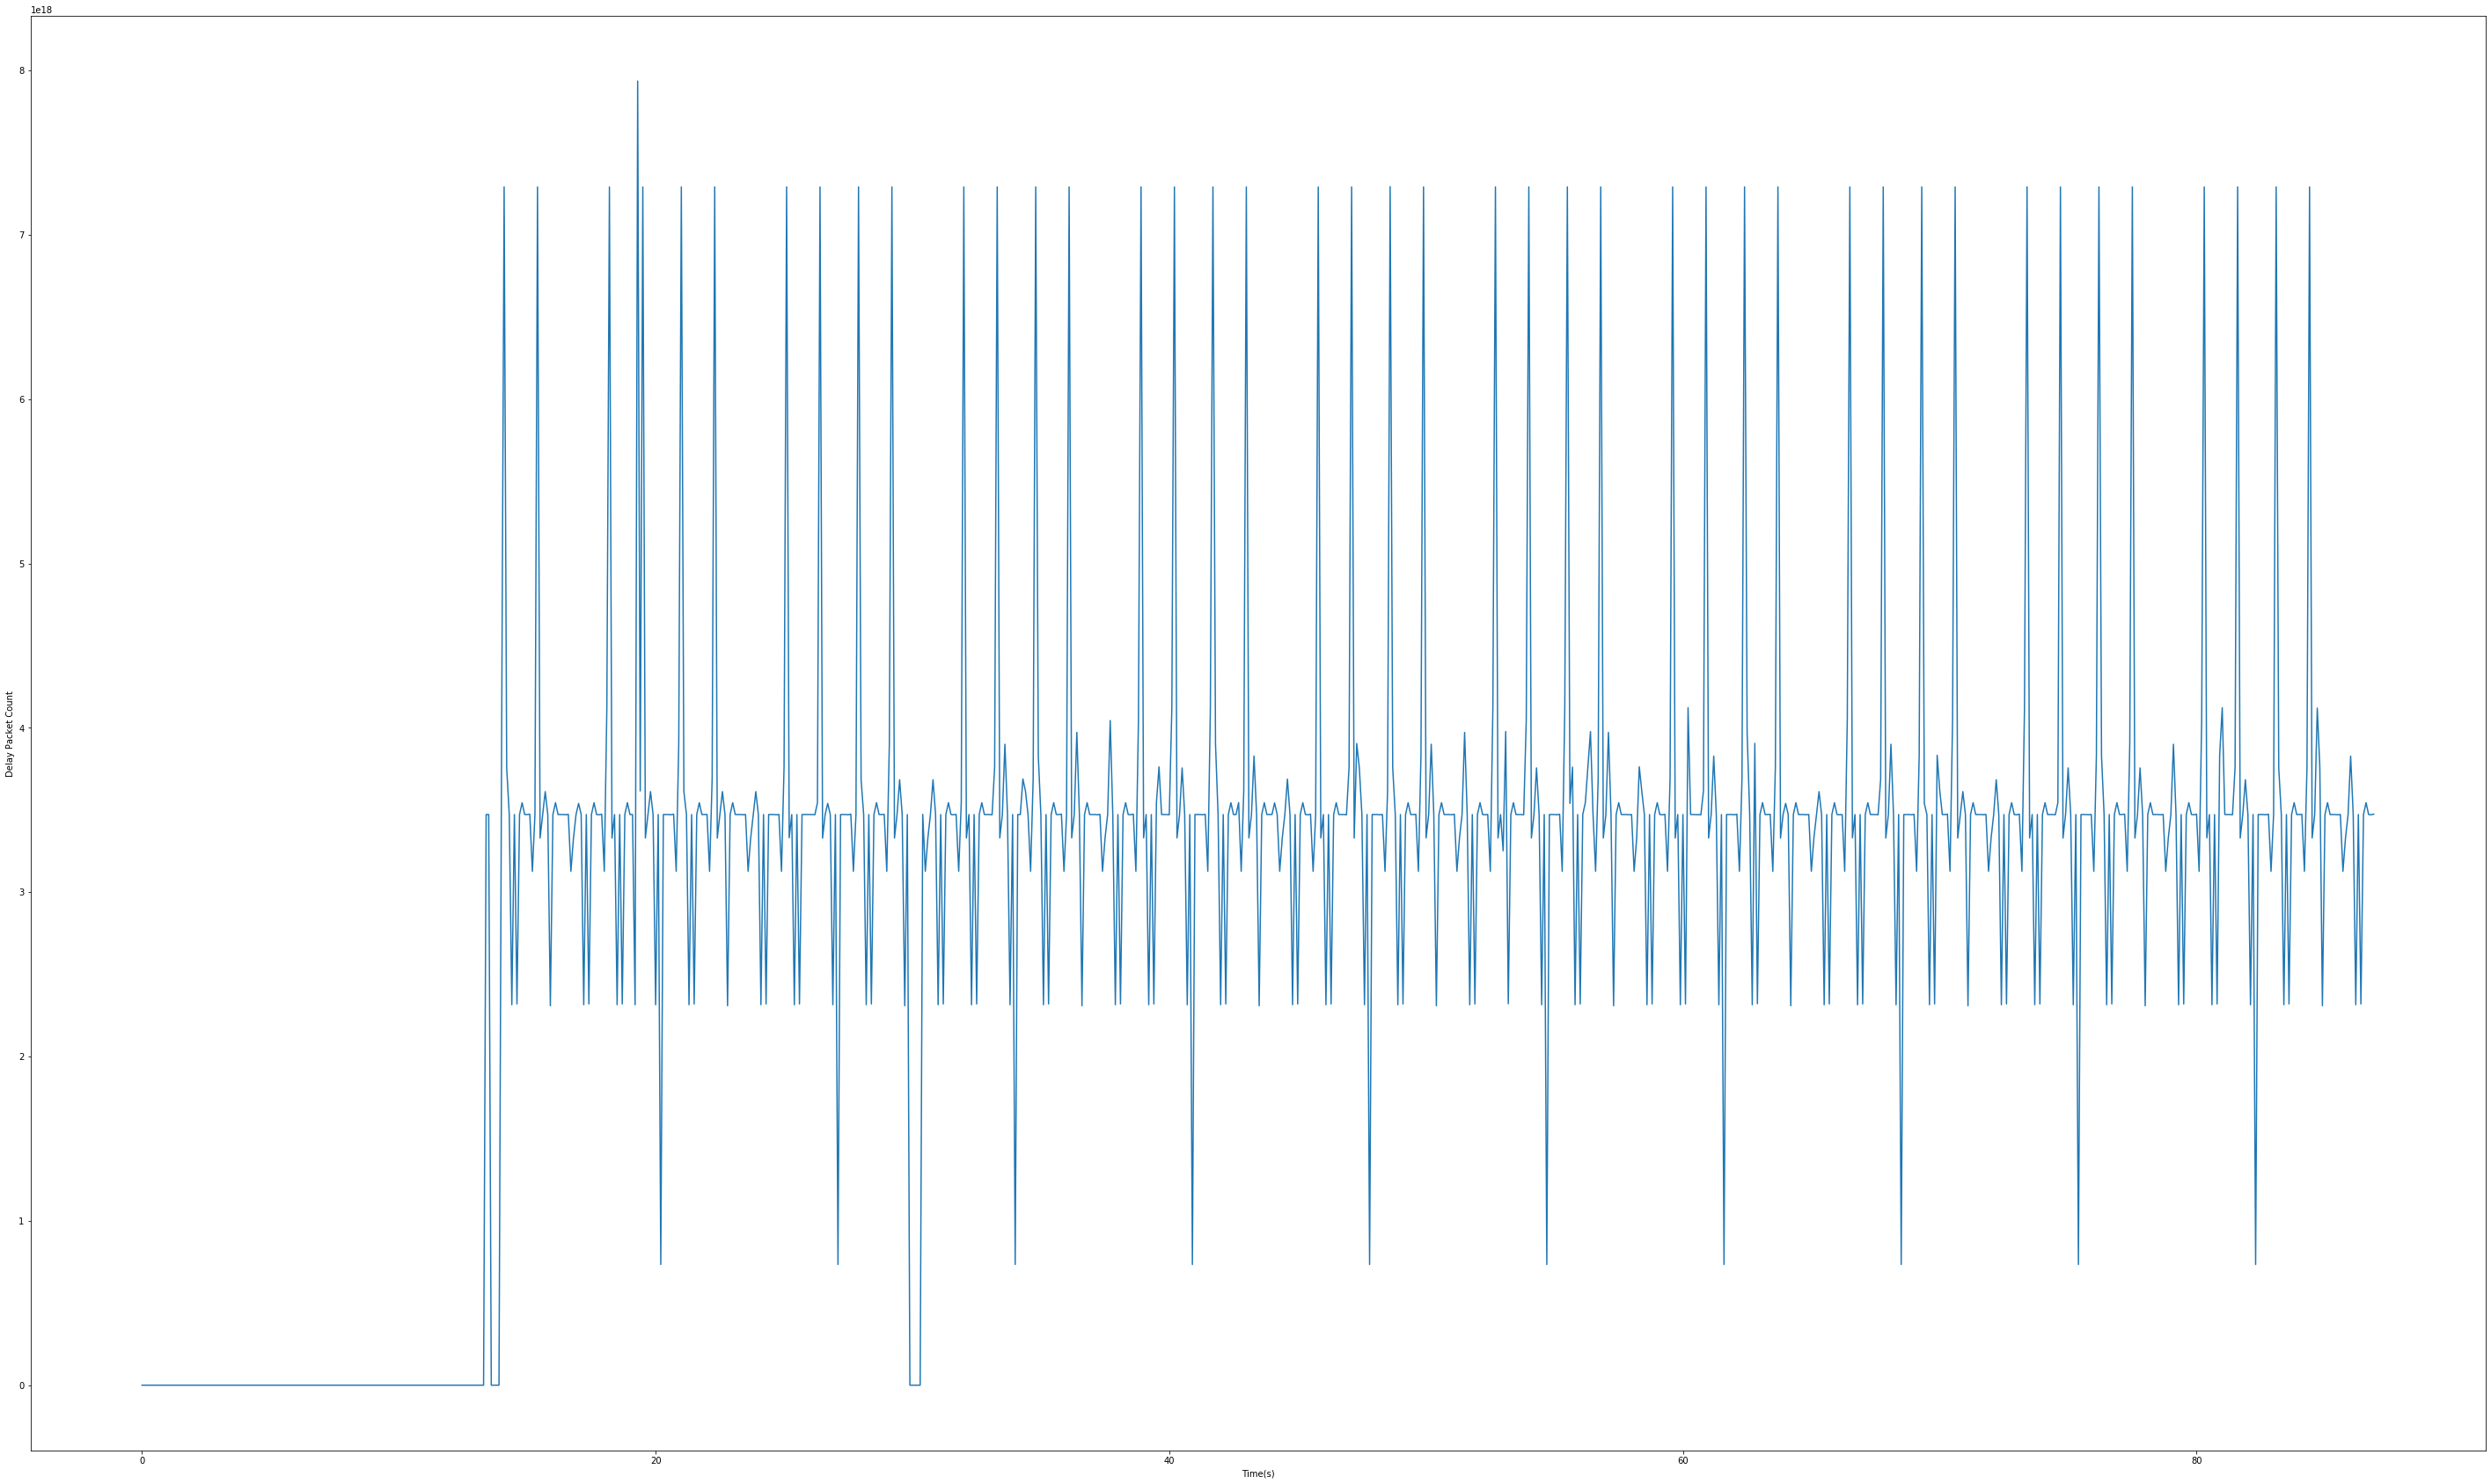

In [15]:
t = np.arange(0, col_count/10,0.1)
plt.figure(figsize=(50,30))
plt.plot(t, delay_packet_count)
plt.xlabel("Time(s)")
plt.ylabel("Delay Packet Count")